# How to extract data from the UK Biobank

#### Created by: Whitney Teagle

#### Contents
1. [Create a Jupyter notebook](#section1)  
    1.a. [Biowulf](#section1)
2. [Download data from UKB](#section2)  
3. [Find variables of interest](#section3)  
4. [Create dataset from UKB](#section4)  
    4.a. [Prepare environment](#section4)  
    4.b. [Load UK Biobank raw dataset](#section4.b)  
        4.b.i. Making a dataset   
        4.b.ii. Load the memory-efficient dataset  
    4.c. [Make a key](#section4.c)  
    4.d. [Extract data from UK Biobank raw dataset](#section4.d)  
        4.c.i. Demographics data
        4.c.ii. ICD-10 codes/Elixhauser Comorbidity Index  
        4.c.iii. Mental health variables  

<a id='section1'></a>

## 1. Create a Jupyter notebook

### 1.a. Biowulf
Goal: use Jupyter Lab on Biowulf.

#### Step 1. Allocate an interactive session in Biowulf

1. Connect to NIH VPN
2. Open PuTTY and connect to Biowulf
3. Login with username and password

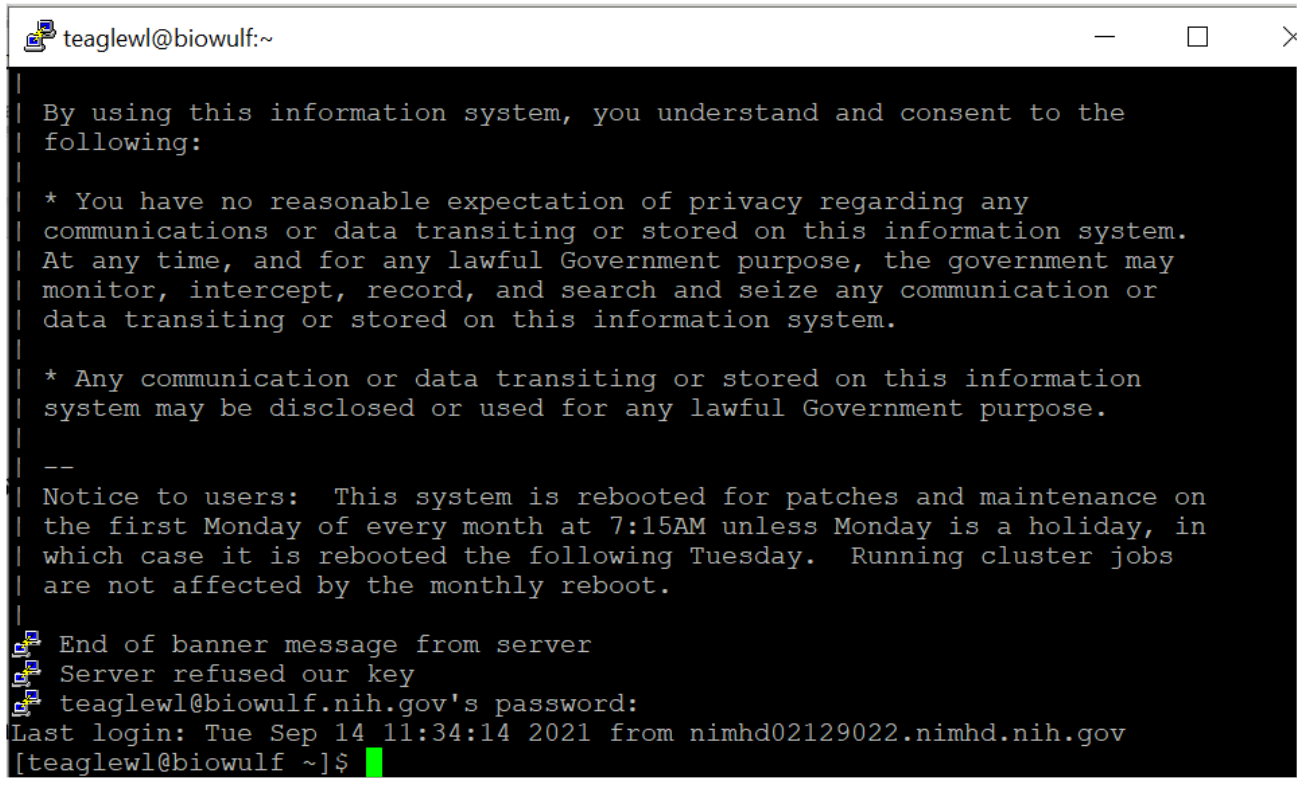

4. Allocate an interactive session using the following code:
> sinteractive --gres=lscratch:5 --mem=200g --tunnel

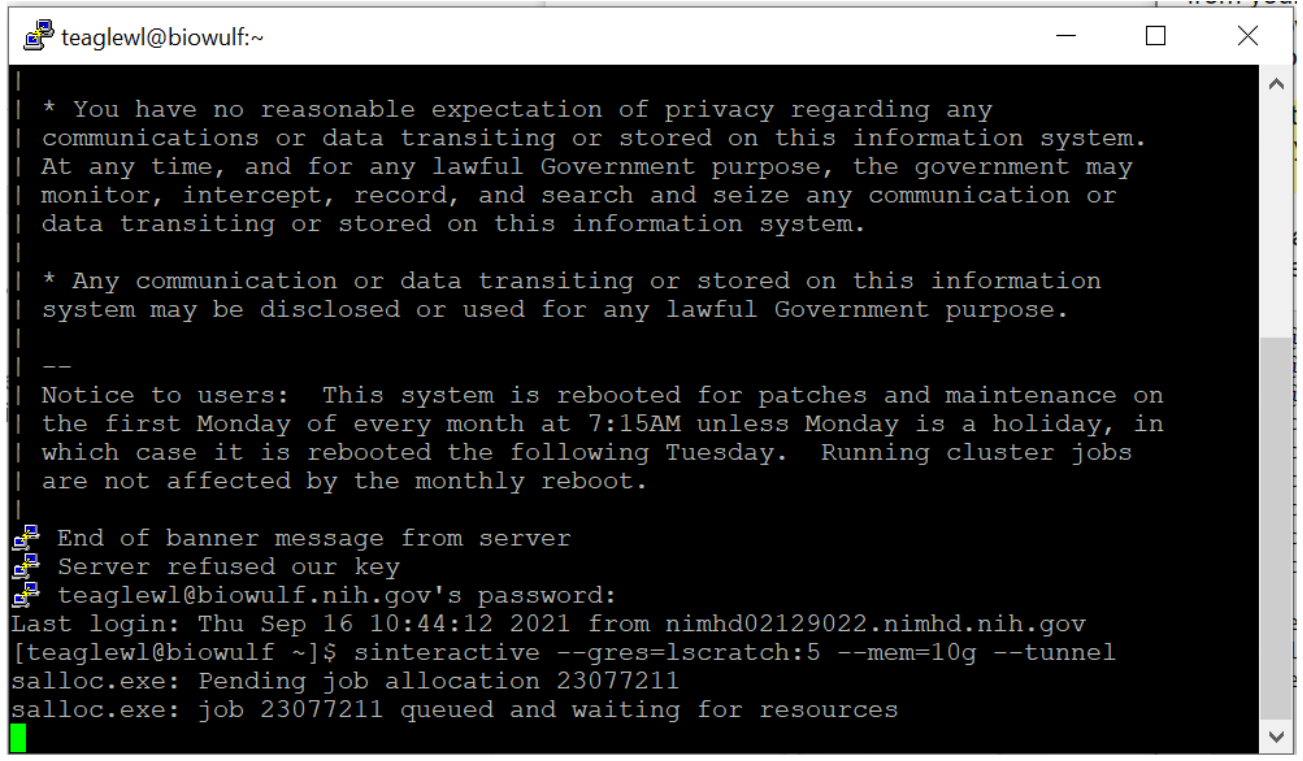

While this is loading, move on to step 2.

Note: The eventual output of this command will say what port to use:
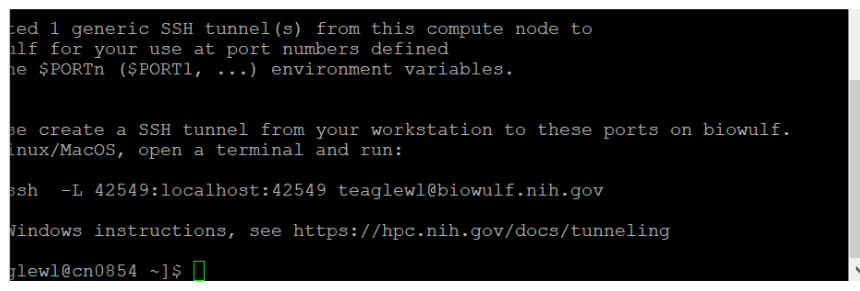
In this example, the port is 42549.
Keep this information in your brain for later.

#### Step 2. Open new PuTTY window

1. Leaving the PuTTY window from Step 1 running, open a new PuTTY session.
2. Load Biowulf (but don't "Open" right away!)

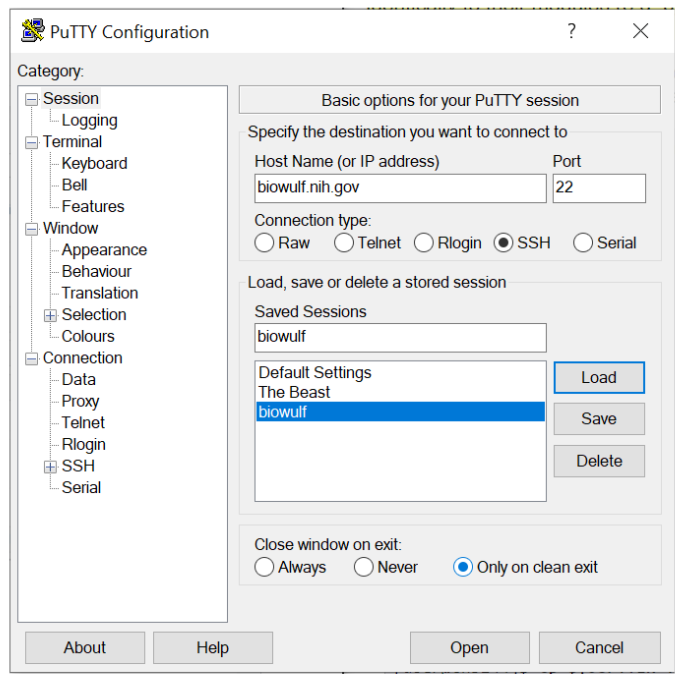

3. Go to the Tunnels settings in the SSH tab. There, input the following information in "Source port" and "Destination" (see below), including the port number from your first PuTTY session:

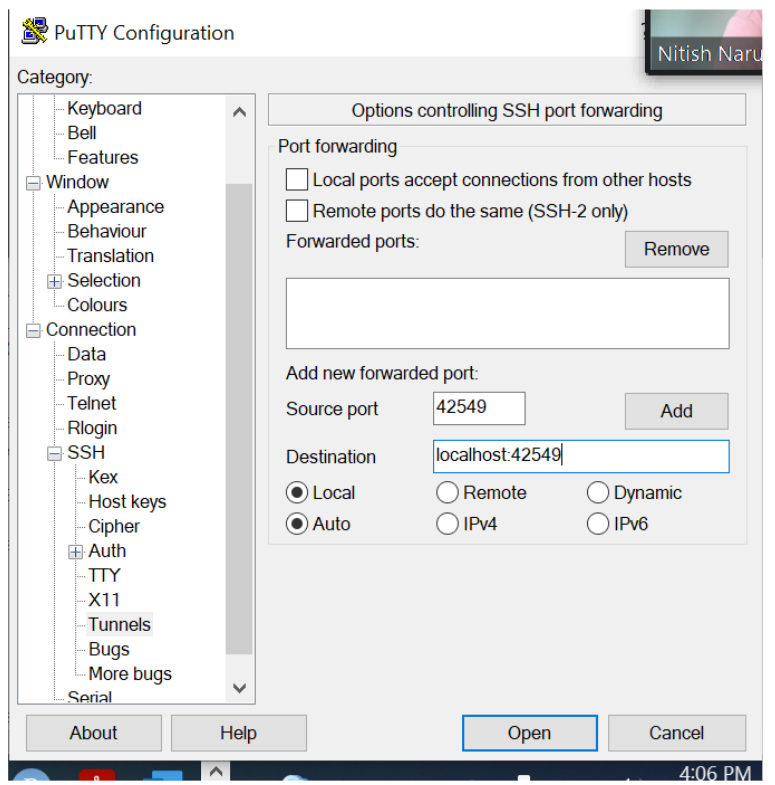

4. Click "Add".
5. Click "Open", then login using your username and password. Next, proceed to Step 3.

#### Step 3. Initiate Jupyter notebook

1. In the first PuTTY window (the one created during Step 1), start a Jupyter instance using the following code:
> module load jupyter  
2. Use the following code to initiate a Jupyter notebook:
> jupyter notebook --ip localhost --port $PORT1 --no-browser

- Note: if you get the following error,
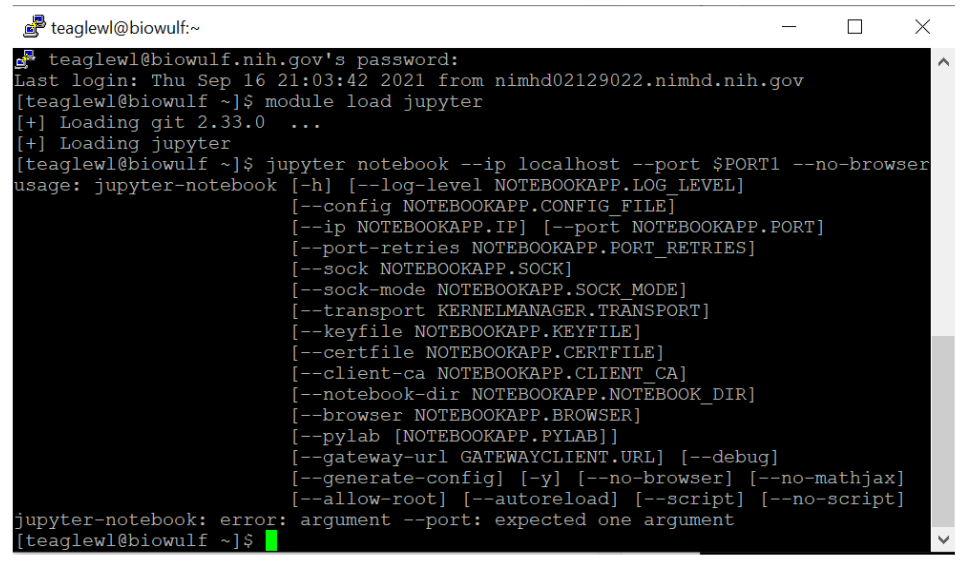
Then you are trying to do this step in the wrong PuTTY window. Go back to the original PuTTY window (the first one you made, in Step 1 of these instructions) and try running the code in Step 3 of these instructions there.

3. Copy the link given in the output:
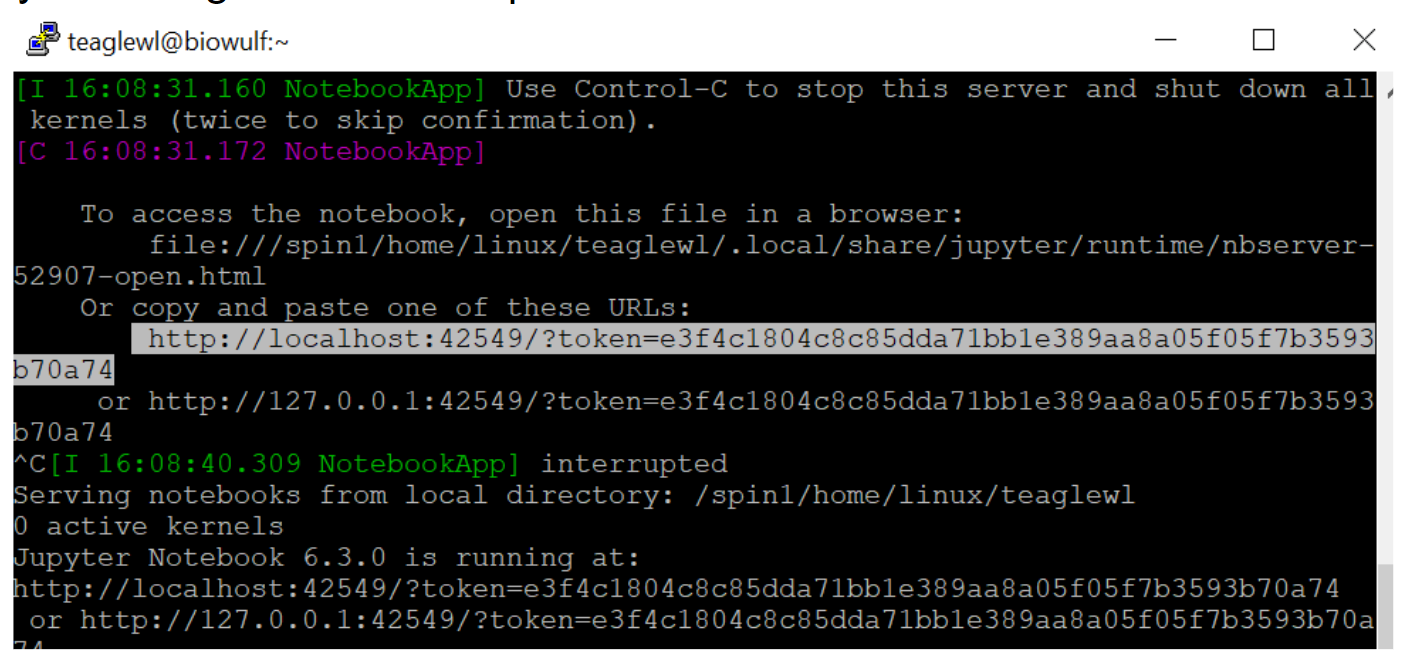

4. Paste the link into the search bar in your internet browser and push enter to start your Jupyter notebook session. 

When you are done with Jupyter, save your changes in the browser and close both PuTTY windows.

**More information:**

Jupyter on Biowulf https://hpc.nih.gov/apps/jupyter.html  
SSH Tunneling on Biowulf https://hpc.nih.gov/docs/tunneling/ 

<a id='section1.b'></a>

### 1.b. NIMHD server
Instructions for creating a Jupyter notebook in Dr. Marino-Ramirez's **NIMHD server** forthcoming.

<a id='section2'></a>

## 2. Download data from UKB

Note: This data takes up at least 130G memory, so you should request 200G memory for the nodes when requesting an sinteractive session in Biowulf.  

Likewise, prepare to save the data in a directory that has enough disc space available (at least 55G).  

*****  


#### 1. Navigate to UK Biobank data download page
To download UKB data from https://www.ukbiobank.ac.uk/, click the menu button on the top right of the screen. From there, click “Researcher log in” and follow the instructions to log in using your UKB credentials.  

In the menu on the left side of the screen, click on “Projects”. Then, click the “View/Update” button. This will navigate you to a page with your application details, with the Application ID at the top of the page.  

Click on “Data”, located at the top of the page. Then click on the button under “Data refresh or download” (Go to Showcase to refresh or download data).  

Here you will see six files:
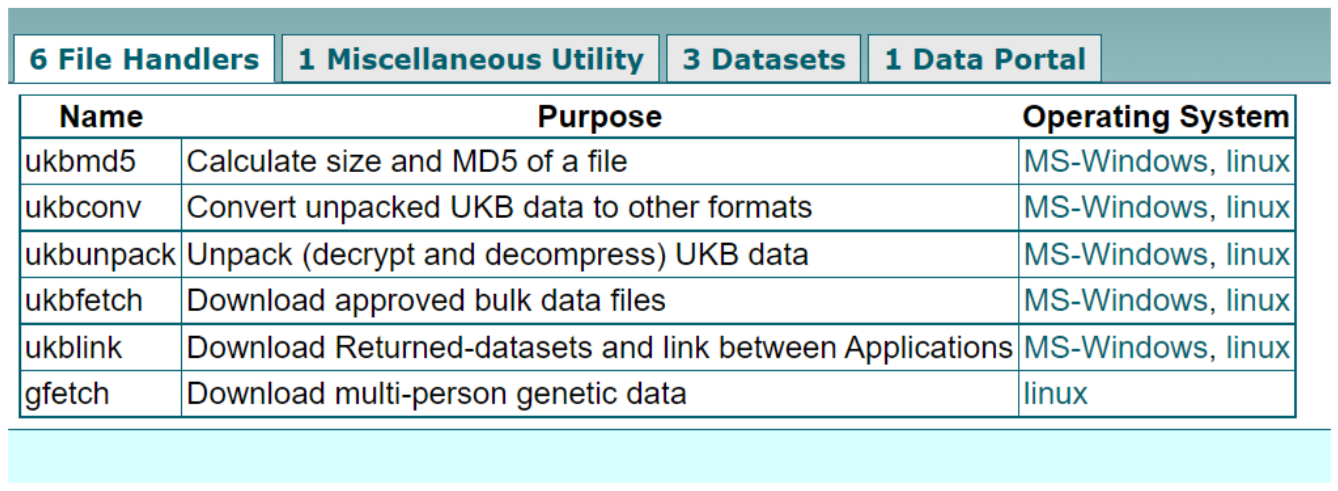

#### 2. Download programs for data processing
For each file located under “6 File Handlers”, 
* Click the link for your Operating System of choice (for example, we used linux).  
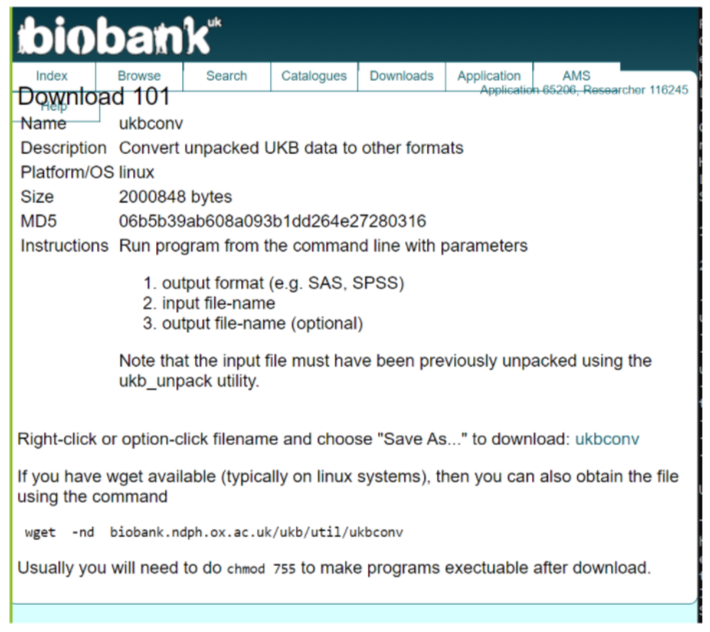
* Get the **wget** code. In the example above, the code is **“wget -nd biobank.ndph.ox.ac.uk/ukb/util/ukbconv**”.  
* In the server/directory you want to download the data to, paste and run the code.  
* Once it is done, run the following code:  
> chmod 755 [file name]  

Replace [file name] with the name of the file you are downloading. In this example, the file name is “ukbconv”.  
* Then run the following code to make sure the file is now executable (aka turned into green text in your terminal):
> ls -l  

Next, click on “1 Miscellaneous Utility”: 
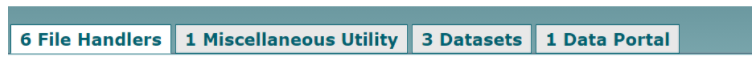  

Click on the “all” link under Operating System and download the encoding.ukb file:
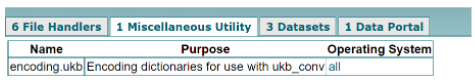

#### 3. Download UKB datasets
Finally, click on the “3 Datasets” tab and follow the instructions on screen to download the data.

#### 4. Process UKB datasets
After you have downloaded each of the files, follow the instructions located at https://biobank.ctsu.ox.ac.uk/~bbdatan/Accessing_UKB_data_v2.3.pdf, beginning with section 2.4.

#### Notes and checks:
Note: if the programs are not in your path (downloaded into a “bin” directory), you will have to execute them from your directory. To do so, add “./” before each command through sections 2.6.3 in order to execute the line from the current directory. For example, when decrypting the encrypted file “ukb12345.enc” (replacing 12345 with your application number) in step 2.4, type  
> ./ukbmd5 ukb12345.enc

The MD5 checksum for our data should be xxxxxxxxxxxxxxxxxxxxxxxxxxxx18ce  
(refer to email for the first 28 digits)

Note, when finished expect these sizes for the data:

> [teaglewl@biowulf raw_data]$ ls -lh  
> total 58G  
> -rw-r--r--. 1 teaglewl teaglewl  44M Jul 25 07:11 encoding.ukb  
> -rw-r--r--. 1 teaglewl teaglewl  20K Sep 23 15:40 fields.ukb  
> -rwxr-xr-x. 1 teaglewl teaglewl 356K Jul 25 07:11 gfetch  
> -rw-r-----. 1 teaglewl teaglewl 3.4G Sep 22 12:21 my_ukb_data.rda  
> -rw-r--r--. 1 teaglewl teaglewl 376M Sep 23 11:12 ukb12345.csv  
> -rw-r--r--. 1 teaglewl teaglewl 4.9G Mar 13  2021 ukb12345.enc  
> -rw-r-----. 1 teaglewl teaglewl  16G Sep 22 07:38 ukb12345.enc_ukb  
> -rw-r-----. 1 teaglewl teaglewl  11M Sep 23 17:50 ukb12345.html  
> -rw-r--r--. 1 teaglewl teaglewl  354 Sep 23 17:50 ukb12345.log  
> -rw-r-----. 1 teaglewl teaglewl 511K Sep 24 09:41 ukb12345.r  
> -rw-r--r--. 1 teaglewl teaglewl  34G Sep 23 14:43 ukb12345.tab  
> -rwxr-xr-x. 1 teaglewl teaglewl 2.0M Mar 14  2018 ukbconv  
> -rwxr-xr-x. 1 teaglewl teaglewl 335K Jul 25 07:11 ukbfetch  
> -rwxr-xr-x. 1 teaglewl teaglewl 327K Jul 25 07:11 ukblink  
> -rwxr-xr-x. 1 teaglewl teaglewl 1.8M Mar 14  2018 ukbmd5  
> -rwxr-xr-x. 1 teaglewl teaglewl 1.5M Mar 14  2018 ukbunpack  

Steps to confirm data is complete forthcoming.

<a id='section3'></a>

## 3. Find variables of interest
For more information as well as alternative ways to search for variables, categories, and data, see https://biobank.ndph.ox.ac.uk/ukb/ukb/exinfo/ShowcaseUserGuide.pdf

***
Beginning at the UK Biobank website, https://www.ukbiobank.ac.uk/, click on “Data Showcase”.
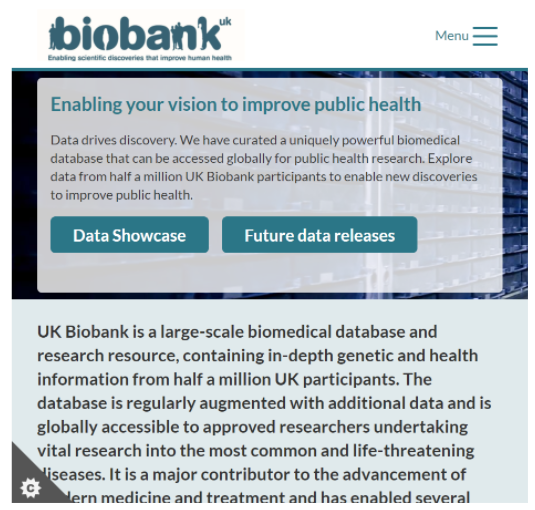  
***

Next, click on “Browse”:
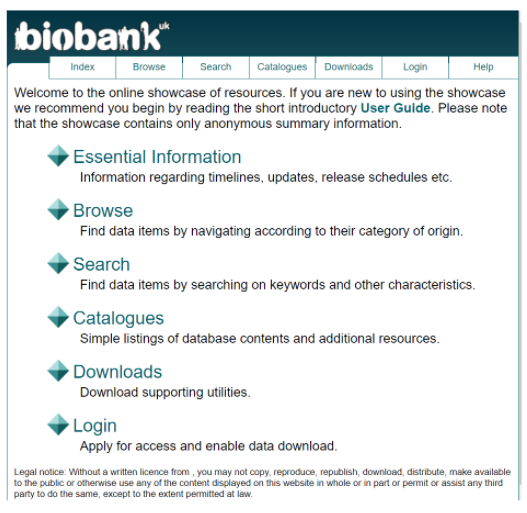  
***

Here you find a series of folders with the data structure:
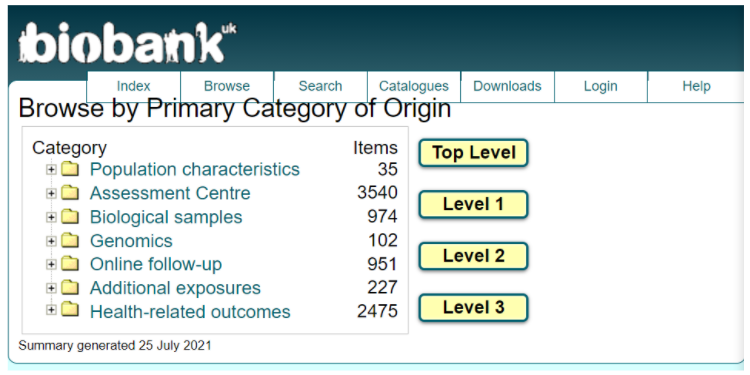  
***

Click on the + buttons to expand the folders.
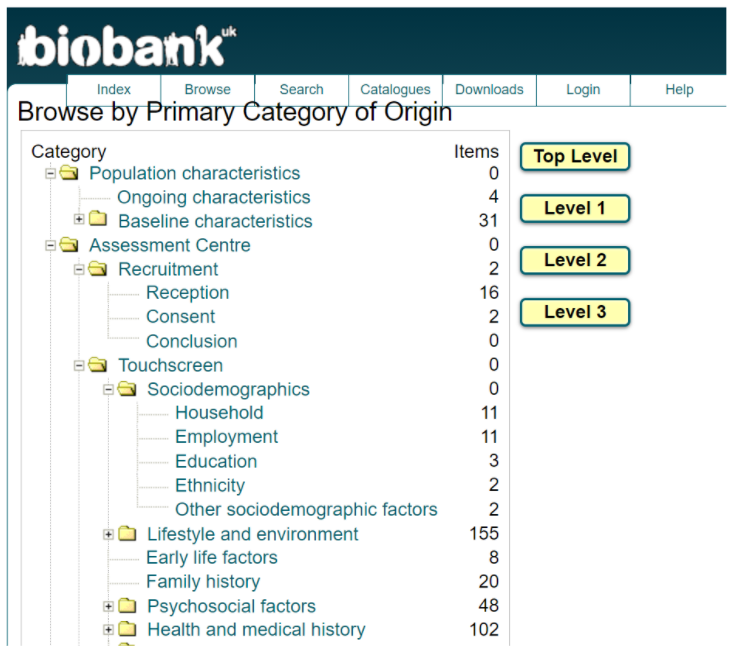  
***

You can also click on the folder names themselves, and you will be navigated directly to the contents of that folder, such as when I click on “Population characteristics”:
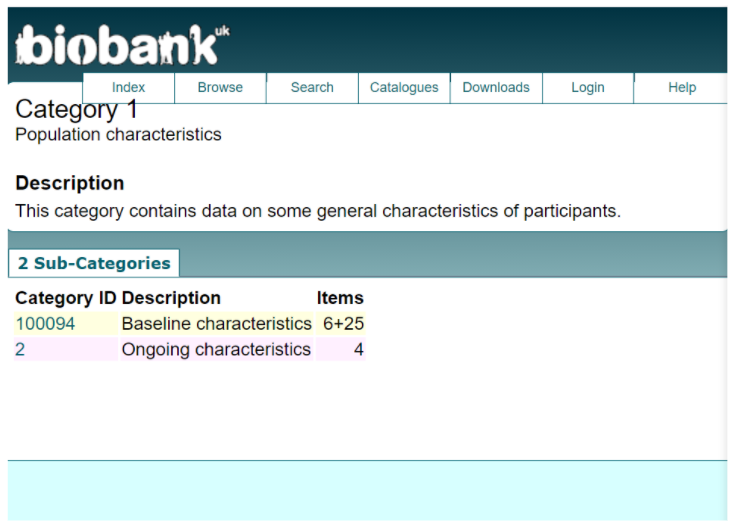  
***

From either location, keep clicking until you find what you’re interested in. For example, under Population characteristics, I selected Baseline characteristics, then Indices of Multiple Deprivation. This is the furthest level before reaching the data fields, and clicking here I reach the following page with information about Indices of Multiple Deprivation (under the Description and Notes, as shown), the data fields themselves (see 25 Data-Fields), etc.
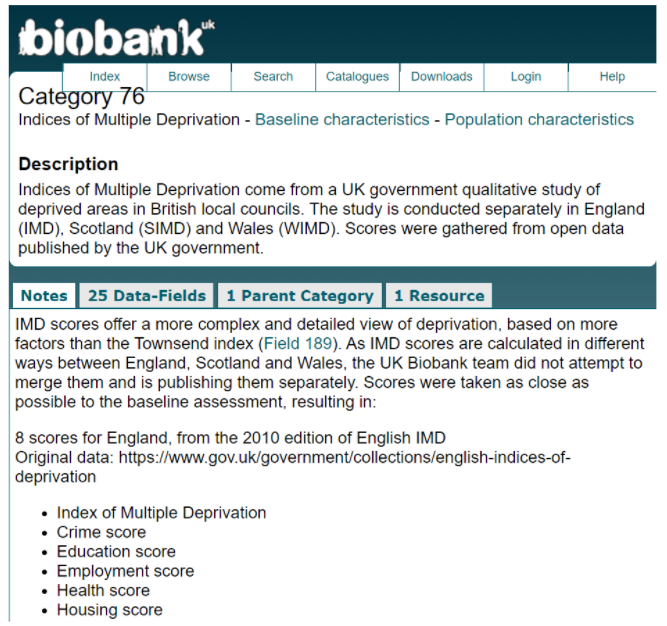  
***

Clicking on “# Data-Fields”, I find the variables found in the UK Biobank under that categorization. 
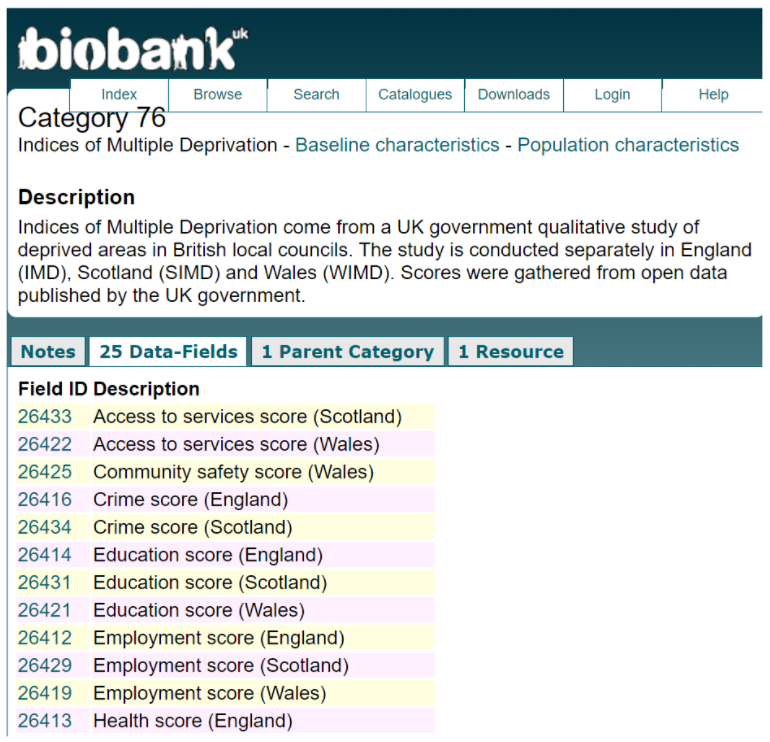  
***

You can also create a data dictionary when you download your data (see documentation on downloading data from the UK Biobank for more information).

<a id='section4'></a>

## 4. Create dataset from UK Biobank

### 4.a. Prepare environment

In [2]:
rm(list = ls()) # Clear environment

In [3]:
# Install required packages
install.packages(c('comorbidity', 
                   'ukbtools', 
                   'tidyverse', 
                   'tibble', 
                   'dplyr', 
                   'readr',
                   'data.table'))

Installing packages into ‘/spin1/home/linux/teaglewl/R/4.0/library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("comorbidity", "ukbtools", "tidyverse", "tibble", :
“installation of package ‘tibble’ had non-zero exit status”
Warning message in install.packages(c("comorbidity", "ukbtools", "tidyverse", "tibble", :
“installation of package ‘data.table’ had non-zero exit status”
Warning message in install.packages(c("comorbidity", "ukbtools", "tidyverse", "tibble", :
“installation of package ‘dplyr’ had non-zero exit status”
Warning message in install.packages(c("comorbidity", "ukbtools", "tidyverse", "tibble", :
“installation of package ‘readr’ had non-zero exit status”


In [18]:
# Load required packages
library(comorbidity)
library(ukbtools)
library(reshape2)
library(tidyverse)
library(tibble)
library(readr)
library(data.table)
library(ggplot2)

<a id='section4.b'></a>

### 4.b. Load UK Biobank raw dataset
Note: this step takes a while and requires lots of computing resources. If the Kernel keeps crashing, start over with more memory (like 100g instead of 10 when you allocate an interactive session in PuTTY).

If you are beginning with .r, .html, and .tab files, then follow the instructions located at https://cran.r-project.org/web/packages/ukbtools/vignettes/explore-ukb-data.html to get started. The following sections ultimately create a memory-efficient .rda file:
- Getting started
- Installing the package
- Making a dataset
- Making a key
- Memory and efficiency

These steps are outlined in section 4.b.i. and only need to be completed once.

Otherwise, proceed with the code in section 4.b.ii.

#### 4.b.i. Making a dataset

In [5]:
# Returns a dataframe with usable column names
my_ukb_data <- ukb_df("ukb45856", path = "/data/teaglewl/ukbiobank/raw_data") # Replace "ukb45856" with the equivalent name for your UKB data

Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [6]:
# To reduce memory usage, save UKB dataset with the following code:
save(my_ukb_data, file = "/data/teaglewl/ukbiobank/raw_data/my_ukb_data.rda")

#### 4.b.ii. Load the memory-efficient dataset

In [7]:
# Load the memory-efficient dataset with the following code:
load("/data/teaglewl/ukbiobank/raw_data/my_ukb_data.rda") # Replace filepath

<a id='section4.c'></a>

### 4.c. Make a key

The following code creates a data.frame with columns for data field names and descriptions. You will use this to find UKB column names as you create your dataset.

In [9]:
# Use ukb_df_field to create a field code-to-descriptive name key, as dataframe or named lookup vector.
my_ukb_key <- ukb_df_field("ukb45856", path = "/data/teaglewl/ukbiobank/raw_data")

#### ukb_df_field columns:

* **field.showcase** -- how the field appears in the online UKB showcase
* **field.html** -- how the field appears in the html file in your UKB fileset
* **field.tab** -- how the field appears in the tab file in your fileset
* **col.name** -- the descriptive name that ukb_df assigns to the variable

In [44]:
head(my_ukb_key)

field.showcase field.html field.tab col.type col.name                        
1 eid            eid        f.eid     Sequence eid                             
2 3              3-0.0      f.3.0.0   Integer  verbal_interview_duration_f3_0_0
3 3              3-1.0      f.3.1.0   Integer  verbal_interview_duration_f3_1_0
4 3              3-2.0      f.3.2.0   Integer  verbal_interview_duration_f3_2_0
5 3              3-3.0      f.3.3.0   Integer  verbal_interview_duration_f3_3_0
6 4              4-0.0      f.4.0.0   Integer  biometrics_duration_f4_0_0

<a id='section4.d'></a>

### 4.d. Extract data from UK Biobank raw dataset
More information, including functions and tools for extracting data from the UK Biobank, can be found at https://cran.r-project.org/web/packages/ukbtools/ukbtools.pdf.

<a id='section4.d.i'></a>

#### 4.d.i. Demographics data
UKB Primary Demographics can be found here: https://biobank.ctsu.ox.ac.uk/crystal/label.cgi?id=1001

###### Select fields of interest

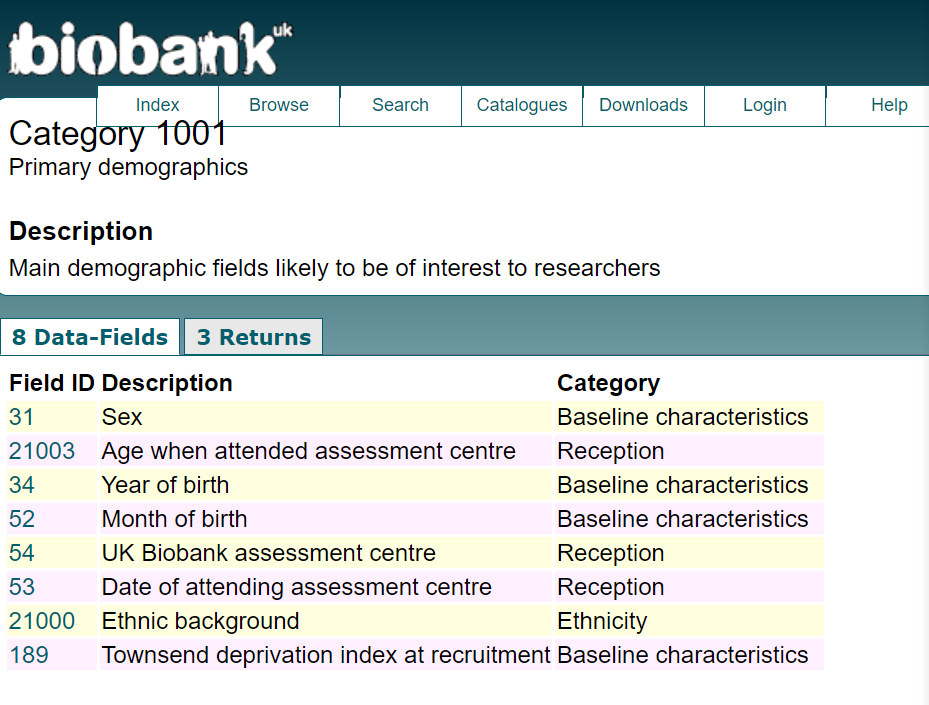

###### Create key

In [11]:
# Define variables of interest from your search in the UKB showcase 
demographics_vars_showcase <- c("eid", "31", "21003", "34", "52", "54", "53", "21000", "189") # These numbers come from the Field ID column
demographics_vars_showcase

[1] "eid"   "31"    "21003" "34"    "52"    "54"    "53"    "21000" "189"

In [12]:
# Using my_ukb_key, create a data.frame with the field.showcase values (which we already have) and the col.name values (which is what we will use to query the UKB raw data)
# demographics_vars_key <- my_ukb_key[my_ukb_key$field.showcase %in% demographics_vars_showcase] # This worked yesterday, but now is getting an error.
demographics_vars_key <- dplyr::filter(my_ukb_key,
             my_ukb_key$field.showcase %in% demographics_vars_showcase) # Whereas this didn't work yesterday. So, if this doesn't work in the future, try switching to the other way.

In [13]:
# Remove duplicate data (just keep unique field.showcase and col.name rows) and superfluous columns
demographics_vars_key <- demographics_vars_key[!duplicated(demographics_vars_key$col.name), ]
demographics_vars_key <- demographics_vars_key[,c("field.showcase", "col.name")]

In [14]:
# Check key
unique(demographics_vars_key$field.showcase) # Confirm values match selected values
demographics_vars_key

[1] "eid"   "31"    "34"    "52"    "53"    "54"    "189"   "21000" "21003"

field.showcase col.name                                          
1  eid            eid                                               
2  31             sex_f31_0_0                                       
3  34             year_of_birth_f34_0_0                             
4  52             month_of_birth_f52_0_0                            
5  53             date_of_attending_assessment_centre_f53_0_0       
6  53             date_of_attending_assessment_centre_f53_1_0       
7  53             date_of_attending_assessment_centre_f53_2_0       
8  53             date_of_attending_assessment_centre_f53_3_0       
9  54             uk_biobank_assessment_centre_f54_0_0              
10 54             uk_biobank_assessment_centre_f54_1_0              
11 54             uk_biobank_assessment_centre_f54_2_0              
12 54             uk_biobank_assessment_centre_f54_3_0              
13 189            townsend_deprivation_index_at_recruitment_f189_0_0
14 21000          ethnic_background_f21000_0_0                      
15 21000          ethnic_background_f21000_1_0                      
16 21000          ethnic_background_f21000_2_0                      
17 21003          age_when_attended_assessment_centre_f21003_0_0    
18 21003          age_when_attended_assessment_centre_f21003_1_0    
19 21003          age_when_attended_assessment_centre_f21003_2_0    
20 21003          age_when_attended_assessment_centre_f21003_3_0

###### Create demographics dataset

In [15]:
# Using demographics_vars_key, create a data.frame with only UKB data fields found in demographics_vars_key
demographics_data <- select(my_ukb_data, matches(demographics_vars_key$col.name))

In [16]:
# Save dataset as .txt file
write.table(demographics_data, 
            file = "ukb-data-extraction-demo-df-demographics.txt", # Saves into the current working directory. To specify otherwise, include the filepath in the file variable.
            sep = "\t", 
            quote = FALSE, 
            row.names = FALSE) 

In [17]:
# Example code that loads a previously saved .txt file dataset
dem_data <- read.table(file = "ukb-data-extraction-demo-df-demographics.txt", # Include full filepath if necessary
                                  sep = "\t",
                                  header = TRUE)
head(dem_data, 5)

eid     sex_f31_0_0 year_of_birth_f34_0_0 month_of_birth_f52_0_0
1 1000017 Male        1943                  May                   
2 1000025 Male        1941                  May                   
3 1000038 Female      1942                  August                
4 1000042 Female      1957                  December              
5 1000056 Female      1943                  December              
  date_of_attending_assessment_centre_f53_0_0
1 2010-03-18                                 
2 2009-10-12                                 
3 2009-03-25                                 
4 2008-10-20                                 
5 2010-02-16                                 
  date_of_attending_assessment_centre_f53_1_0
1 NA                                         
2 NA                                         
3 NA                                         
4 NA                                         
5 NA                                         
  date_of_attending_assessment_centre_f53_2_0
1 NA                                         
2 NA                                         
3 NA                                         
4 NA                                         
5 NA                                         
  date_of_attending_assessment_centre_f53_3_0
1 NA                                         
2 NA                                         
3 NA                                         
4 NA                                         
5 NA                                         
  uk_biobank_assessment_centre_f54_0_0 uk_biobank_assessment_centre_f54_1_0
1 11014                                NA                                  
2 11020                                NA                                  
3 11011                                NA                                  
4 11011                                NA                                  
5 11016                                NA                                  
  uk_biobank_assessment_centre_f54_2_0 uk_biobank_assessment_centre_f54_3_0
1 NA                                   NA                                  
2 NA                                   NA                                  
3 NA                                   NA                                  
4 NA                                   NA                                  
5 NA                                   NA                                  
  townsend_deprivation_index_at_recruitment_f189_0_0
1 -3.8801100                                        
2  0.3249240                                        
3 -0.0789324                                        
4  1.4941200                                        
5  6.2030600                                        
  ethnic_background_f21000_0_0 ethnic_background_f21000_1_0
1 British                      NA                          
2 Any other Asian background   NA                          
3 British                      NA                          
4 British                      NA                          
5 British                      NA                          
  ethnic_background_f21000_2_0 age_when_attended_assessment_centre_f21003_0_0
1 NA                           66                                            
2 NA                           68                                            
3 NA                           66                                            
4 NA                           50                                            
5 NA                           66                                            
  age_when_attended_assessment_centre_f21003_1_0
1 NA                                            
2 NA                                            
3 NA                                            
4 NA                                            
5 NA                                            
  age_when_attended_assessment_centre_f21003_2_0
1 NA                                            
2 NA                                          

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


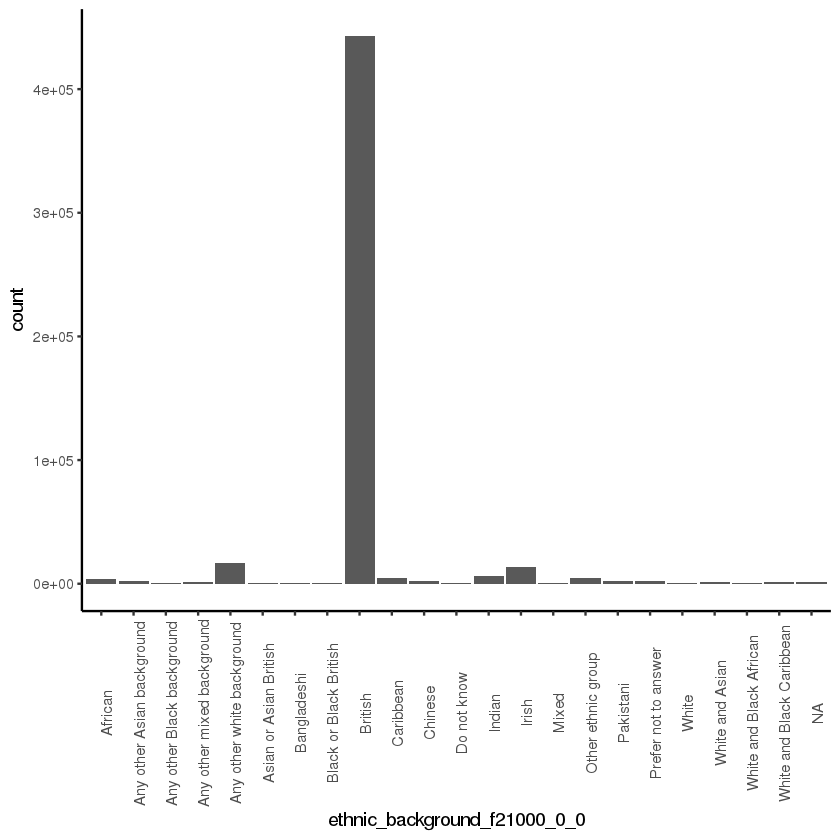

In [38]:
# Example table: Ethnic groups in the UK Biobank
ggplot(data = dem_data, aes(x = ethnic_background_f21000_0_0)) +
geom_histogram(stat = "count") +
theme_classic() +
theme(axis.text.x = element_text(angle = 90))

<a id='section4.d.ii'></a>

#### 4.d.ii. ICD-10 codes/Elixhauser Comorbidity Index
The [comorbidity package](https://cran.r-project.org/web/packages/comorbidity/comorbidity.pdf) was used to generate the Elixhauser Comorbidity Index dataset used in this example.

In [20]:
# Create dataset with only variables which have "ICD10" in the colname
ukb_subset_ICD10 <- my_ukb_data[ , grepl("icd10", names(my_ukb_data))]
colnames_ICD10 <- colnames(ukb_subset_ICD10)
ukb_subset_ICD10_eid <- my_ukb_data[c('eid', colnames_ICD10)]

In [21]:
# Drop columns with "date" in the colname
ukb_nodate <- ukb_subset_ICD10_eid[, !grepl("date", names(ukb_subset_ICD10_eid))]

In [39]:
# Via 'melt' function, turn the dataset into two columns (eid and ICD-10 values) for use with comorbidity package
melted_data <- reshape2::melt(ukb_nodate, id.vars = 'eid') # not renaming "value" column
head(melted_data, 5)

eid     variable                                           value
1 1000017 underlying_primary_cause_of_death_icd10_f40001_0_0 NA   
2 1000025 underlying_primary_cause_of_death_icd10_f40001_0_0 NA   
3 1000038 underlying_primary_cause_of_death_icd10_f40001_0_0 C19  
4 1000042 underlying_primary_cause_of_death_icd10_f40001_0_0 NA   
5 1000056 underlying_primary_cause_of_death_icd10_f40001_0_0 NA

In [40]:
# Optional: save a temp data file (my kernel kept dying)
write.table(melted_data, 
            file = "temp_data.txt", 
            sep = "\t", 
            quote = FALSE, 
            row.names = FALSE) # Saves into the current working directory. To specify otherwise, include the filepath in the file variable.

In [41]:
# Optional pt. 2: read the temp data file
melted_data <- read.table(file = "temp_data.txt", # Include full filepath if necessary
                                  sep = "\t",
                                  header = TRUE)

In [42]:
# Compute Elixhauser comorbidity scores
elixhauser <- comorbidity(x = melted_data, 
                          id = "eid", 
                          code = "value", 
                          score = "elixhauser", 
                          icd = "icd10", 
                          assign0 = FALSE)
head(elixhauser, 5)

eid     chf carit valv pcd pvd hypunc hypc para ond ⋯ alcohol drug psycho
1 1000017 0   0     0    0   0   0      0    0    0   ⋯ 0       0    0     
2 1000025 0   0     0    0   0   0      0    0    0   ⋯ 0       0    0     
3 1000038 0   0     1    0   0   0      0    0    0   ⋯ 0       0    1     
4 1000042 0   0     0    0   0   0      0    0    0   ⋯ 0       0    0     
5 1000056 0   0     0    0   0   1      0    0    0   ⋯ 0       0    0     
  depre score index wscore_ahrq wscore_vw windex_ahrq windex_vw
1 0     3     1-4   21          10        >=5         >=5      
2 0     2     1-4   -3           0        <0          0        
3 1     6     >=5    6           3        >=5         1-4      
4 0     0     0      0           0        0           0        
5 0     3     1-4    2           3        1-4         1-4

In [43]:
# Save dataset as .txt file
write.table(elixhauser, 
            file = "ukb-data-extraction-demo-df-elixhauser.txt", # Saves into the current working directory. To specify otherwise, include the filepath in the file variable.
            sep = "\t", 
            quote = FALSE, 
            row.names = FALSE) 

<a id='section4.d.iii'></a>

#### 4.d.iii. Mental health variables

First, navigate to the UK Biobank data showcase as described in part 3 ("Find variables of interest"). Click on Browse data.

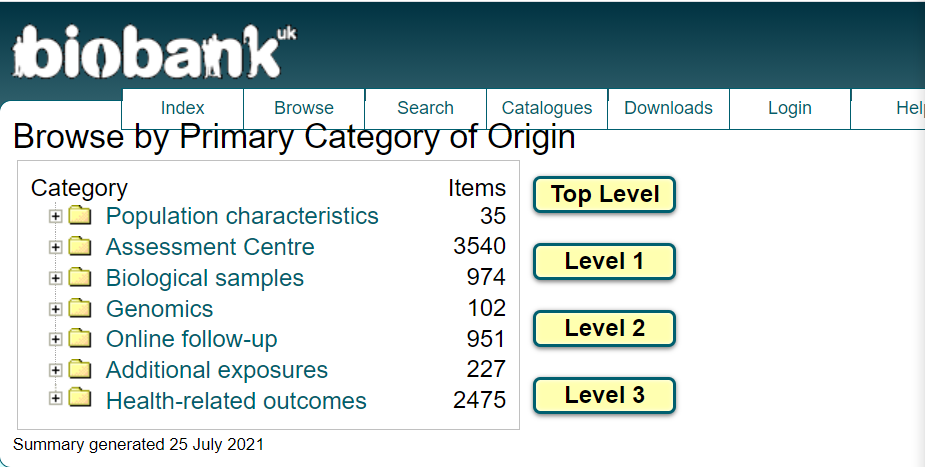

For this demonstration, I selected the following variables:
* Duration of worst depression
* Recent feelings of depression
* Substances taken for depression

These variables were found in **Online follow-up** --> **Mental health** --> **Depression**
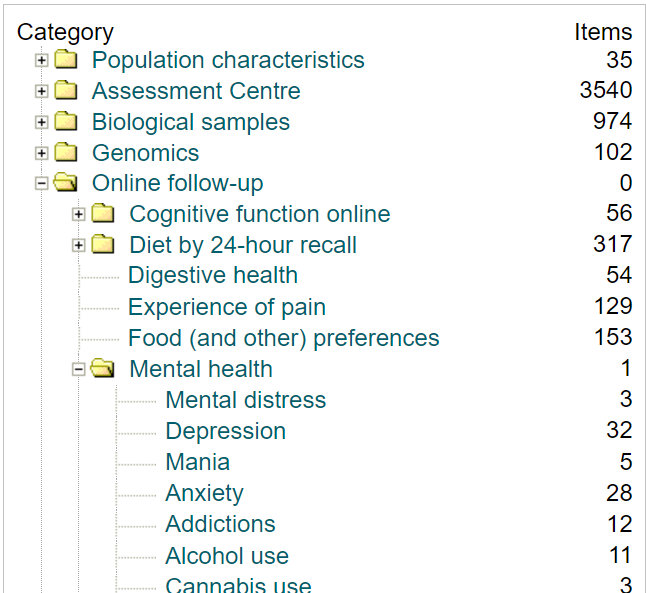

In the following screenshot, numbers refer to the variable Field ID and text is the variable Description. You can find this by clicking on the "Depression" category from the previous page.
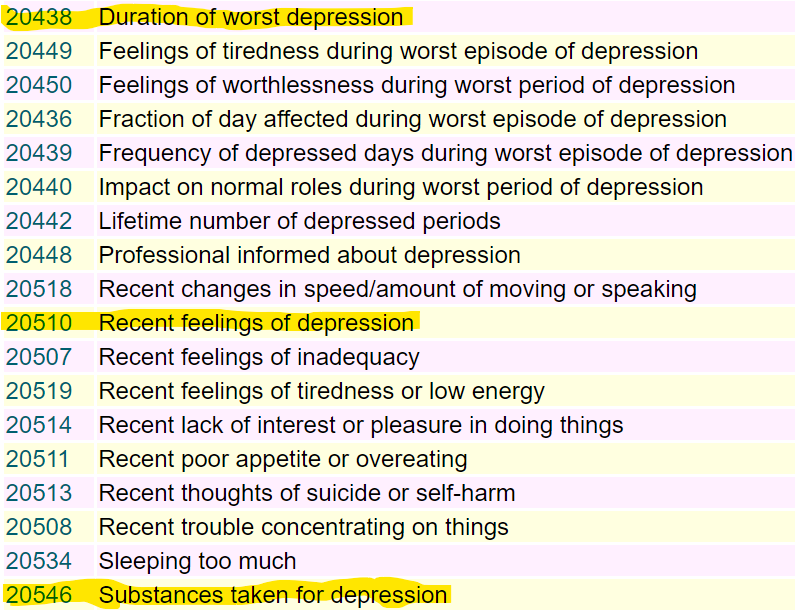

###### Create key

In [27]:
# Define variables of interest from your search in the UKB showcase 
depression_vars_showcase <- c("eid", "20438", "20510", "20546") # These numbers come from the Field ID column
depression_vars_showcase

[1] "eid"   "20438" "20510" "20546"

In [28]:
# Using my_ukb_key, create a data.frame with the field.showcase values (which we already have) and the col.name values (which is what we will use to query the UKB raw data)
depression_vars_key <- dplyr::filter(my_ukb_key,
             my_ukb_key$field.showcase %in% depression_vars_showcase)

In [29]:
# Remove duplicate data (just keep unique field.showcase and col.name rows) and superfluous columns
depression_vars_key <- depression_vars_key[!duplicated(depression_vars_key$col.name), ]
depression_vars_key <- depression_vars_key[,c("field.showcase", "col.name")]

In [30]:
# Check key
unique(depression_vars_key$field.showcase) # Confirm values match selected values
depression_vars_key

[1] "eid"   "20438" "20510" "20546"

field.showcase col.name                                  
1 eid            eid                                       
2 20438          duration_of_worst_depression_f20438_0_0   
3 20510          recent_feelings_of_depression_f20510_0_0  
4 20546          substances_taken_for_depression_f20546_0_1
5 20546          substances_taken_for_depression_f20546_0_2
6 20546          substances_taken_for_depression_f20546_0_3

###### Create mental health - depression dataset

In [31]:
# Using depression_vars_key, create a data.frame with only UKB data fields found in depression_vars_key
depression_data <- select(my_ukb_data, matches(depression_vars_key$col.name))

In [32]:
# Save dataset as .txt file
write.table(depression_data, 
            file = "ukb-data-extraction-demo-df-depression.txt", # Saves into the current working directory. To specify otherwise, include the filepath in the file variable.
            sep = "\t", 
            quote = FALSE, 
            row.names = FALSE) 

In [33]:
head(depression_data)

eid     duration_of_worst_depression_f20438_0_0
1 1000017 NA                                     
2 1000025 NA                                     
3 1000038 NA                                     
4 1000042 NA                                     
5 1000056 NA                                     
6 1000061 Prefer not to answer                   
  recent_feelings_of_depression_f20510_0_0
1 NA                                      
2 NA                                      
3 NA                                      
4 Not at all                              
5 NA                                      
6 Not at all                              
  substances_taken_for_depression_f20546_0_1
1 NA                                        
2 NA                                        
3 NA                                        
4 NA                                        
5 NA                                        
6 NA                                        
  substances_taken_for_depression_f20546_0_2
1 NA                                        
2 NA                                        
3 NA                                        
4 NA                                        
5 NA                                        
6 NA                                        
  substances_taken_for_depression_f20546_0_3
1 NA                                        
2 NA                                        
3 NA                                        
4 NA                                        
5 NA                                        
6 NA

In [34]:
# Example code creating data.frame with 'eid', 'variable', and 'value' columns
melted_data <- reshape2::melt(depression_data, id.vars = 'eid') # More info about warning message here: https://stackoverflow.com/questions/25688897/reshape2-melt-warning-message
head(melted_data)

Warning message:
“attributes are not identical across measure variables; they will be dropped”


eid     variable                                value               
1 1000017 duration_of_worst_depression_f20438_0_0 NA                  
2 1000025 duration_of_worst_depression_f20438_0_0 NA                  
3 1000038 duration_of_worst_depression_f20438_0_0 NA                  
4 1000042 duration_of_worst_depression_f20438_0_0 NA                  
5 1000056 duration_of_worst_depression_f20438_0_0 NA                  
6 1000061 duration_of_worst_depression_f20438_0_0 Prefer not to answer

### Misc

Note: Based on this video, it also looks like there is a program for intuitively creating cohorts similar to the All of Us project: https://www.youtube.com/watch?v=mNRR7yNAg7s&ab_channel=DNAnexus